In [1]:
import collections
import inspect

import numpy as np
import pandas as pd

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/administrator/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

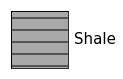

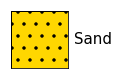

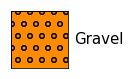

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]"


In [5]:
for i, (name, grp) in enumerate(beds.groupby('name')):
    if i == 0:
        continue
    if i > 1:
        break
        
    grp['grain_size_psi'] = grp['grain_size_mm'].apply(graphiclog.wentworth.gs2psi)
    
    bedseq = graphiclog.BedSequence.from_dataframe(grp, topcol='tops', thickcol='th',
                                         component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                         datacols=['th', 'mean_gs_mm', 'depth_m', 'grain_size_psi'],
                                         metacols=['name', 'collection', 'eod', 'eodnum'])
    
    print(bedseq.values, bedseq.metadata)
    

elev_gap: 87.42309000000004
depth_gap: 5.826450433232822e-13
[[ 1.32920000e-01  1.74892175e-01  8.17069500e+01 -2.75982002e+00]
 [ 1.32920000e-01  1.74892175e-01  8.17647400e+01 -2.52076033e+00]
 [ 1.32920000e-01  1.74892175e-01  8.18109700e+01 -2.39084493e+00]
 ...
 [ 3.87190000e-01  1.25036885e-01  1.49239100e+02 -3.04440984e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49470300e+02 -2.37946464e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49504900e+02 -2.37946464e+00]] {'name': 'Amazon 936A', 'collection': 'Amazon', 'eod': 'fan', 'eodnum': 1}


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
testseq = beds[beds.name == 'Amazon 936A']
testseq['grain_size_psi'] = testseq['grain_size_mm'].apply(graphiclog.wentworth.gs2psi)
testseq

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm,grain_size_psi
3030,Amazon 936A,64,Amazon,fan,1,81.70695,0.13292,0.147643,1.0,0.174892,0.190671,0.32356,0.064516,"[81.70695, 81.76474, 81.81097, 81.83987]","[0.1476425, 0.1742511, 0.1906707, 0.1906707]","[-2.759820023126817, -2.520760331421865, -2.39..."
3031,Amazon 936A,64,Amazon,fan,1,81.83987,0.50854,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[81.83987, 82.34841]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"
3032,Amazon 936A,64,Amazon,fan,1,82.34841,0.39297,0.001000,1.0,0.173817,0.205513,0.32356,0.064516,"[82.34841, 82.40042, 82.72404, 82.74138]","[0.001, 0.1675113, 0.2055128, 0.2055128]","[-9.965784284662087, -2.5776696745164562, -2.2..."
3033,Amazon 936A,64,Amazon,fan,1,82.74138,0.39874,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[82.74138, 83.14012]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"
3034,Amazon 936A,64,Amazon,fan,1,83.14012,1.54875,0.001000,1.0,0.183639,0.205513,0.32356,0.064516,"[83.14012, 83.16324, 83.19791, 84.6253, 84.68887]","[0.001, 0.00896374, 0.1701749, 0.2055128, 0.20...","[-9.965784284662087, -6.801683481658339, -2.55..."
3035,Amazon 936A,64,Amazon,fan,1,84.68887,0.19070,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[84.68887, 84.87957]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"
3036,Amazon 936A,64,Amazon,fan,1,84.87957,0.48543,0.001000,0.0,0.031281,0.186946,0.32356,0.064516,"[84.87957, 85.04138, 85.23786, 85.34766, 85.365]","[0.001, 0.001075826, 0.00918273, 0.1869462, 0....","[-9.965784284662087, -9.860339523901613, -6.76..."
3037,Amazon 936A,64,Amazon,fan,1,85.36500,0.04623,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.365, 85.41123]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"
3038,Amazon 936A,64,Amazon,fan,1,85.41123,0.09824,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.41123, 85.50947]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"
3039,Amazon 936A,64,Amazon,fan,1,85.50947,0.26582,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.50947, 85.77529]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]"


In [7]:
testseq['grain_size_psi'].apply(lambda x: x.min()).min()

-9.965784284662087

In [8]:
bedseq[-8]

Interval({'data': {'th': 0.115569999999991, 'mean_gs_mm': 0.00790084513601033, 'depth_m': array([146.0723, 146.0723, 146.1127, 146.1705, 146.1878]), 'grain_size_psi': array([-9.96578428, -9.84710429, -6.79123741, -6.69018076, -6.69018076])}, 'top': Position({'middle': 146.07228, 'units': 'm'}), 'base': Position({'middle': 146.18785, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'shale'})]})

In [17]:
bedseq.start, bedseq.stop

(Position({'middle': 81.70695, 'units': 'm'}),
 Position({'middle': 149.50494, 'units': 'm'}))

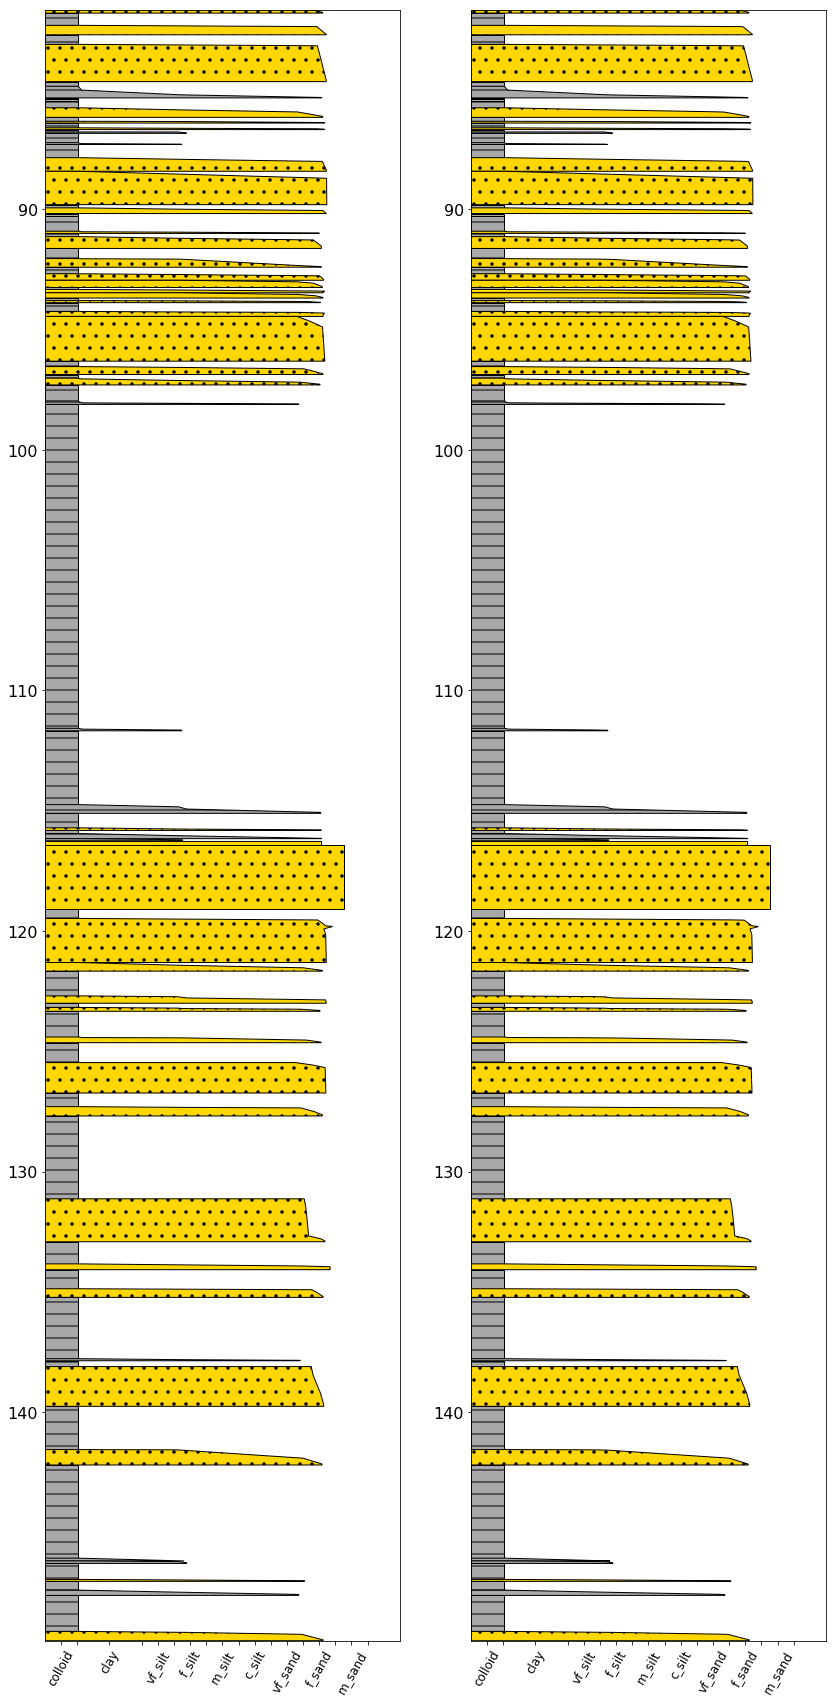

In [18]:
fig, ax = plt.subplots(figsize=(14,30), ncols=2)
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[0])

bedseq.resample_data('depth_m', 0.01)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[1])

In [29]:
bedseq.min_field('grain_size_psi')

-9.965784284662087